In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [2]:
qc = QuantumCircuit(2)

In [3]:
qc.h(0)

In [4]:
qc.cx(0,1)

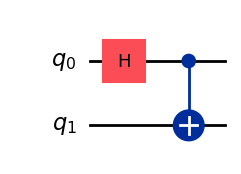

In [5]:
qc.draw("mpl")

In [6]:
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]


In [7]:
observables = [SparsePauliOp(label) for label in observables_labels]


In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService


In [9]:
service = QiskitRuntimeService()


In [10]:
backend = service.least_busy(simulator=False, operational=True)


In [11]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)


In [12]:
isa_circuit = pm.run(qc)


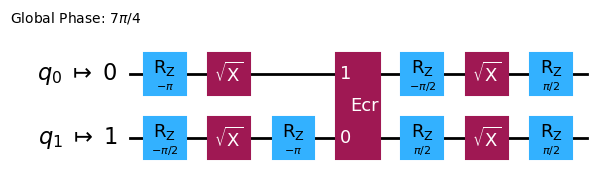

In [13]:
isa_circuit.draw('mpl', idle_wires=False)


In [15]:
estimator = Estimator(backend=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

In [16]:
job = estimator.run([(isa_circuit, mapped_observables)])

In [17]:
print(f">>> Job ID: {job.job_id()}")


>>> Job ID: csf87m6cz7x0008jcjxg


In [18]:
job_result = job.result()


In [19]:
pub_result = job.result()[0]


In [20]:
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds

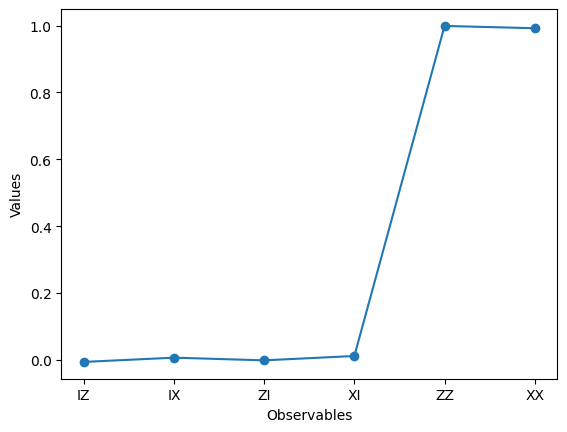

In [21]:
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

In [22]:
print(values)

[-0.00593861  0.00678699 -0.00122415  0.01183349  0.99911724  0.99216384]
